In [1]:
import gvar as gv
import numpy as np
import matplotlib.pyplot as plt

from lametlat.utils.plot_settings import *

### 2pt Fit

dict_keys(['2pt_gv', 'da_re_gv', 'da_im_gv'])
Least Square Fit:
  chi2/dof [dof] = 0.68 [7]    Q = 0.69    logGBF = 62.461

Parameters:
             E0   1.101 (28)     [     1 (10) ]  
       log(dE1)   -0.39 (26)     [     0 ± 10 ]  
         O00_re       1 (10)     [     1 (10) ]  
         O00_im       1 (10)     [     1 (10) ]  
         O01_re       1 (10)     [     1 (10) ]  
         O01_im       1 (10)     [     1 (10) ]  
         O11_re       1 (10)     [     1 (10) ]  
         O11_im       1 (10)     [     1 (10) ]  
             z0   0.284 (34)     [     1 (10) ]  
             z1    0.63 (13)     [     1 (10) ]  
          re_b1       0 ± 10     [     0 ± 10 ]  
          re_b2       0 ± 10     [     0 ± 10 ]  
          re_b3       0 ± 10     [     0 ± 10 ]  
          re_c1       0 ± 10     [     0 ± 10 ]  
          im_b1       0 ± 10     [     0 ± 10 ]  
          im_b2       0 ± 10     [     0 ± 10 ]  
          im_b3       0 ± 10     [     0 ± 10 ]  
          im_c

/home/jinchen/git/package/LaMETLat/lametlat/preprocess/read_raw.py:70: RuntimeWarning: invalid value encountered in log
  meff_array = np.arccosh( (pt2_array[2:] + pt2_array[:-2]) / (2 * pt2_array[1:-1]) ) #! This is not always correct.
/home/jinchen/git/package/LaMETLat/lametlat/preprocess/read_raw.py:70: RuntimeWarning: invalid value encountered in arccosh
  meff_array = np.arccosh( (pt2_array[2:] + pt2_array[:-2]) / (2 * pt2_array[1:-1]) ) #! This is not always correct.


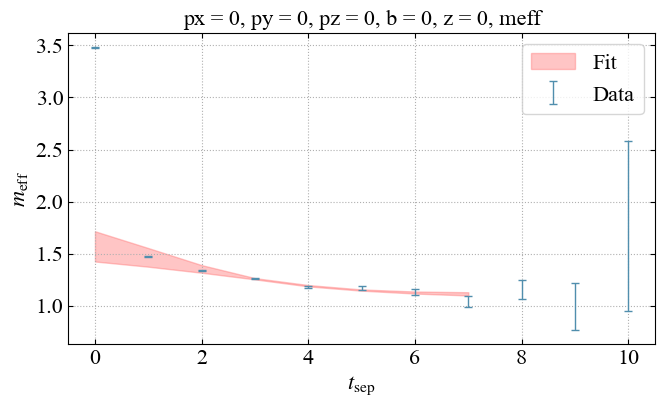

In [2]:
from lametlat.gsfit.pt2_fit import pt2_two_state_fit, plot_2pt_fit_on_meff

da_fake_data = gv.load("data/da_fake_data.gv")
print(da_fake_data.keys())
pt2_gv = da_fake_data["2pt_gv"]

tmin = 3
tmax = 10
Lt = 64

px = py = pz = 0
b = 0
z = 0
err_t_ls = np.arange(14)
fill_t_ls = np.arange(tmax)
id_label = {"px": px, "py": py, "pz": pz, "b": b, "z": z}

pt2_fit_res = pt2_two_state_fit(pt2_gv, tmin, tmax, Lt, normalize=True, label="Test")
print(pt2_fit_res)
fig, ax = plot_2pt_fit_on_meff(pt2_gv[err_t_ls], pt2_fit_res, err_t_ls, fill_t_ls, id_label, Lt)


### DA Fit

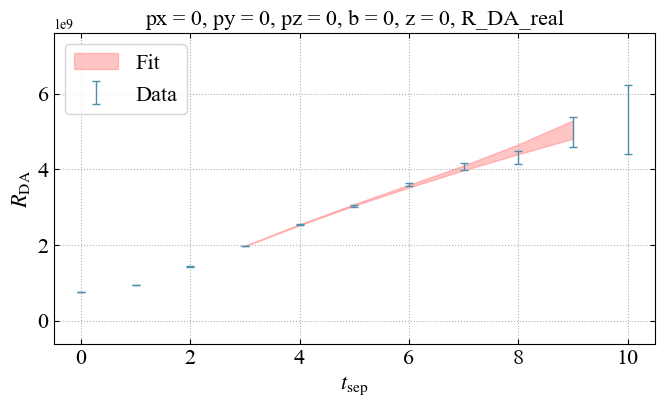

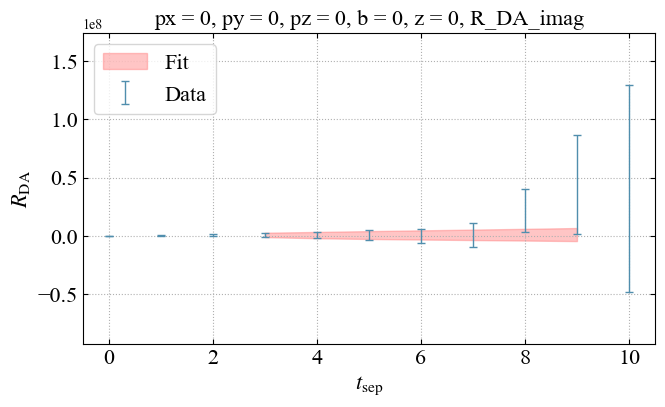

In [3]:
from lametlat.gsfit.pt2_fit import pt2_two_state_fit
from lametlat.gsfit.da_fit import da_two_state_fit, plot_da_fit_on_ratio

da_re_gv = da_fake_data["da_re_gv"]
da_im_gv = da_fake_data["da_im_gv"]

tmin = 3
tmax = 10
Lt = 64

px = py = pz = 0
b = 0
z = 0
    
id_label = {"px": px, "py": py, "pz": pz, "b": b, "z": z}

pt2_fit_res = pt2_two_state_fit(pt2_gv, tmin, tmax, Lt, normalize=False, label=id_label)

da_fit_res = da_two_state_fit(da_re_gv, da_im_gv, tmin, tmax, Lt, id_label, pt2_fit_res=None)


err_t_ls = np.arange(11)
fill_t_ls = np.arange(tmin, tmax)

fig_re, ax_re, fig_im, ax_im = plot_da_fit_on_ratio(pt2_gv[err_t_ls], pt2_fit_res, da_re_gv[err_t_ls], da_im_gv[err_t_ls], da_fit_res, err_t_ls, fill_t_ls, id_label, Lt)



### Ratio Fit

dict_keys(['ra_re_tsep6', 'ra_im_tsep6', 'ra_re_tsep8', 'ra_im_tsep8', 'ra_re_tsep10', 'ra_im_tsep10', 'ra_re_tsep12', 'ra_im_tsep12'])
Least Square Fit:
  chi2/dof [dof] = 1 [30]    Q = 0.43    logGBF = 173.24

Parameters:
             E0          1.101 (11)        [   1.101 (28) ]  
       log(dE1)         -0.388 (58)        [   -0.39 (26) ]  
         O00_re          2.231 (23)        [       1 (10) ]  
         O00_im        -0.0035 (36)        [       1 (10) ]  
         O01_re        -0.0277 (18)        [       1 (10) ]  
         O01_im       -0.00037 (58)        [       1 (10) ]  
         O11_re           4.12 (45)        [       1 (10) ]  
         O11_im           0.51 (36)        [       1 (10) ]  
             z0        5.88(25)e-11        [ 5.87(71)e-11 ]  
             z1       1.311(70)e-10        [ 1.31(26)e-10 ]  
          re_b1   -8.83293e-17 ± 10        [       0 ± 10 ]  
          re_b2   -7.95035e-16 ± 10        [       0 ± 10 ]  
          re_b3   -2.17727e-16 ±

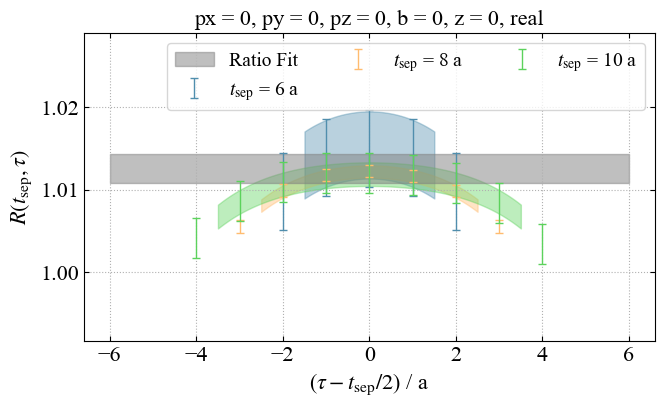

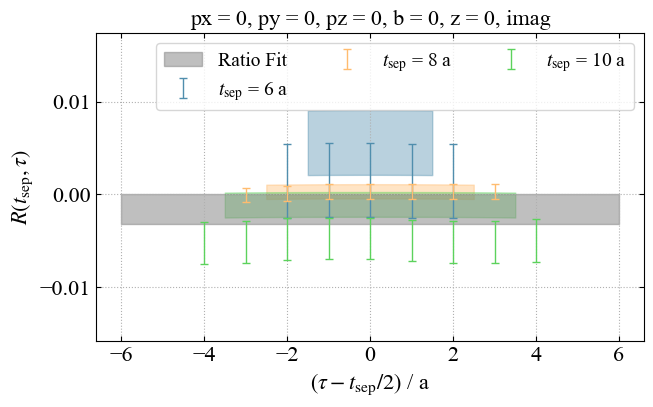

In [10]:
from lametlat.gsfit.ratio_fit import ra_two_state_fit, plot_ra_fit_on_data

ratio_fake_data = gv.load("data/ratio_fake_data.gv")
print(ratio_fake_data.keys())

tsep_ls = [6, 8, 10]
tau_cut = 2
Lt = 64

id_label = {"px": px, "py": py, "pz": pz, "b": b, "z": z}

ra_re_avg_dic = {}
ra_im_avg_dic = {}

for tsep in tsep_ls:
    ra_re_avg_dic[f"tsep_{tsep}"] = ratio_fake_data[f"ra_re_tsep{tsep}"]
    ra_im_avg_dic[f"tsep_{tsep}"] = ratio_fake_data[f"ra_im_tsep{tsep}"]

ra_fit_res = ra_two_state_fit(ra_re_avg_dic, ra_im_avg_dic, tsep_ls, tau_cut, Lt, id_label, pt2_fit_res=pt2_fit_res)
print(ra_fit_res)

err_tsep_ls = tsep_ls
fill_tsep_ls = tsep_ls

ra_re_avg = []
ra_im_avg = []
for tsep in err_tsep_ls:
    ra_re_avg.append(ra_re_avg_dic[f"tsep_{tsep}"])
    ra_im_avg.append(ra_im_avg_dic[f"tsep_{tsep}"])
    
ra_re_avg = np.array(ra_re_avg)
ra_im_avg = np.array(ra_im_avg)

fig_real, fig_imag, ax_real, ax_imag = plot_ra_fit_on_data(ra_re_avg, ra_im_avg, ra_fit_res, err_tsep_ls, fill_tsep_ls, Lt, id_label, err_tau_cut=1, fill_tau_cut=2)
